In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
from sympy import * 


In [40]:
from tensorflow import keras 

In [2]:
'''' 
RSI - (Relative Strength Index) - Technical Indicator in Trading used to find if the trend observed in previous days 
will continue or NOT . 


[RSI = 100 - 100/1+RS ] where RS (relative Strength_ ) = Avg Gain/ Avg Loss over past some days (g/L calcualted wrt prev Days CLosing Price )

if ( 0 < RSI < 30 ) , oversold and price was decreasing till NOW  and now increase so buy it (LONG POSITIOn)
and vice versa for ( 70 < RSI < 100 ) -> SHORT (sell it)

'''

"' \nRSI - (Relative Strength Index) - Technical Indicator in Trading used to find if the trend observed in previous days \nwill continue or NOT . \n\n\n[RSI = 100 - 100/1+RS ] where RS (relative Strength_ ) = Avg Gain/ Avg Loss over past some days (g/L calcualted wrt prev Days CLosing Price )\n\nif ( 0 < RSI < 30 ) , oversold and price was decreasing till NOW  and now increase so buy it (LONG POSITIOn)\nand vice versa for ( 70 < RSI < 100 ) -> SHORT (sell it)\n\n"

In [3]:
# COde the RSI 

import yfinance as yf  # for historical stock martket data 

data = yf.download('SPY')

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,24.684090,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,24.859673,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,24.912336,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.175680,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.281029,531500


In [5]:
import pandas_ta as ta 

In [6]:
'''  

Cl;osing Price (CLose) - The price at which the last stock is traded in the day . 

Adjusted CLosing Price  - It is the last price at which a stock , dividends and all other type of assets are traded in the same day. 

Adj Closing Price - keep s happenng after close 
and is more clear indicator of stock market's  health . 

'''

"  \n\nCl;osing Price (CLose) - The price at which the last stock is traded in the day . \n\nAdjusted CLosing Price  - It is the last price at which a stock , dividends and all other type of assets are traded in the same day. \n\nAdj Closing Price - keep s happenng after close \nand is more clear indicator of stock market's  health . \n\n"

In [7]:
# import pandas_ta as ta 

# data['rsi'] = ta.rsi(data['Adj Close'] , 2 )

In [8]:
''' # function to calculate RSI Prices (for each day ) 

# df.diff() -> return difference b/w all the rows and its just previous row (if period==1 )
# .ewm(com ) -> finds exponential moving average ( weighted sum of the data by giving more weight to more recent obs. abnd less weight toolder observ.)


'''

' # function to calculate RSI Prices (for each day ) \n\n# df.diff() -> return difference b/w all the rows and its just previous row (if period==1 )\n# .ewm(com ) -> finds exponential moving average ( weighted sum of the data by giving more weight to more recent obs. abnd less weight toolder observ.)\n\n\n'

In [9]:

# work for every row (dat) of today's close price

def calculate_rsi(prices , period) :

    momentum = prices.diff() # shows the change in price over a day wrt prev day's adj close price 
    gain = abs (momentum.where (momentum  > 0 , 0 ) )
    loss = abs ( momentum.where(momentum < 0 , 0 ) )
    
    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()  # exponential movbving AVERAGE 
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean() 

    rs = avg_gain/ avg_loss

    rsi = 100 - (100 / (1 + rs ))

    return rsi 

In [10]:
def generate_signals(rsi_list) :

    signals = [] 

    for rsi in rsi_list :

        if rsi < 30 :
            signals.append('BUY') 
        elif rsi > 70 :
            signals.append('SELL')
        else :
            signals.append('HOLD')
        
    return signals 

In [11]:
rsi_list = calculate_rsi(data['Adj Close'] , 14 )

In [12]:
data['RSI'] = rsi_list

In [13]:
data['Signals'] = generate_signals(rsi_list)

In [14]:
data['Signals'].value_counts()

Signals
HOLD    7133
SELL     662
BUY      112
Name: count, dtype: int64

In [15]:
# Newton Raphson's Method of Apptoximation 
# New approx ->   x(n+1)  = x(n) - f(xn)/f'(xn) 



# for complex functions root -> slike sin(x_ + cos3(x) )
def Newton_Raphon_Approx( eqn,  initial_guess ) :
    x_n = initial_guess 

    x = symbols('x')
    eqn_d_x = Derivative( eqn , x).doit() # to simplify the expression  

    x_n_1 = x_n - eqn.subs(x , x_n)/eqn_d_x.subs(x , x_n) # eqn.subs - sunstitutes  x in x_n

    while abs(x_n_1 - x_n) >= 0.0000004 : 
        temp = x_n_1 
        x_n_1 = x_n - eqn.subs(x , x_n)/eqn_d_x.subs(x , x_n)
        x_n =temp 

    return x_n_1 



x = symbols('x')

# USe Sympy to write compelx expression / eqn 
res = Newton_Raphon_Approx( x**2 -1  ,  1.0001)


print( res , " = " , res.evalf())

1.00000000499950  =  1.00000000499950


In [66]:
# Prediction from Univariate Sequential Data ( only feature is Time )

seq = [ 10 , 30 , 50 , 70 , 90 , 110 , 130 ]

seq1  = np.array(seq)

seq = (seq - seq1.mean() )/ seq1.std()

# Decide time step( at a time , len of inp se to LSTM e,g no of words in sentence )
t_steps = 3 
n_features = 1  # (Univariate , endogenous , static )

# MAke training data from given raw (unprocessed) seq 

def inp_seq( seq , t_steps ):
    X= [] 
    Y= []
    for i in range( len(seq) ):
        end_i = i + t_steps 

        if( end_i > len(seq)-1) :
            break
        # take from i to t_steps as X and just after as target var 
        x, y = seq[i:end_i] , seq[end_i]
        X.append(x)
        Y.append(y)
    return np.array(X) , np.array(Y) 

X, y = inp_seq ( seq , t_steps )

# actual INP to LSTM or RNN or GRU are ( no of samples total ( no of rows ),t_steps (no. of cols ), inp_features )
X = X.reshape ( ( X.shape[0] , X.shape[1] ,1  ) ) 


# Now ,a t 1 instant , we pass 1 seq of info .( ie 1 instance of size =3 ) [10 , 20 , 30] and trian the lSTM on it with y = 40 



In [68]:
# Harness the Model 
# units in LSTM - dim of output neurons / dim  of ht (hidden state) /cell stae*ct - LTM )

ts_model = keras.models.Sequential([

   # 1 hidden layer of LSTM   with out dim of ht as = 50 units 
   # USe relu actiavtion snce tanh already sued in LSTM to detemine LTM and STM and  input_shape== (t_steps , no of features )
   keras.layers.LSTM( 50 , activation = "relu" ,  input_shape= (t_steps , n_features ) ) ,

   # FOr final prdictin and processing , use a FUlly CONECTED LAYER ( FCN )
   keras.layers.Dense(1 ) # regression , ONLY 1 output neuron ( with no act ivation )

])

ts_model.compile (loss = "mse" , optimizer = "sgd" , metrics = "mse")


In [69]:
# keep epichs higher wile trianing the LSTM 
history = ts_model.fit( X , y , epochs = 100) 

# sgd is becoming non differntible (part_dev(Loss) / part_dev(w) == 0)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.8100 - mse: 0.8100
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7851 - mse: 0.7851
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7607 - mse: 0.7607
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7374 - mse: 0.7374
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7150 - mse: 0.7150
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6936 - mse: 0.6936
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6732 - mse: 0.6732
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6537 - mse: 0.6537
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6351 - mse: 0.6351
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6173 - mse: 0.6173
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6003

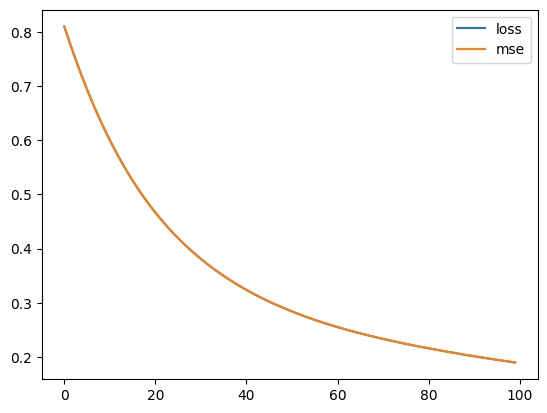

In [70]:
pd.DataFrame( history.history).plot()
plt.show()

In [76]:
# New smaple data for prediction 


''' If MSE > INT_MAX , use Scaling to transform the data '''
X1 = np.array([ 90 , 110 , 130 ])
mu = X1.mean() 
std_ = X1.std()

X1 = ( X1 - mu ) /  std_
X1 = X1.reshape( (1 , 3 , 1 ) )
X1

num = ts_model.predict(X1 ) 
num = num*std_ + mu 
num

1/1 [==============================] - 0s 64ms/step


array([[123.32991]], dtype=float32)